Please **submit this Jupyter notebook through Canvas** no later than **Monday November 12, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

-----
# Exercise 1

## (a)
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

In [2]:
import numpy as np
import scipy as sp
from scipy import linalg as la
from sympy import *
from sympy import Matrix


x = Symbol('x')

matA = Matrix([[1, -1, x], [2, 2, 1], [0, x, -3/2]])

equation = matA.det()
solutions = solve(equation)

print("The values where alpha is zero are:", solutions[0],solutions[1])

The values where alpha is zero are: -1.50000000000000 2.00000000000000


## (b)
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

In [3]:
a = Symbol('a')

matB = Matrix([[2, 1, 1], [2, -1, 3], [-2, a, 3]])

#print(matB.det())
equation = matB.det()
solutions = solve(equation)

print("The values where alpha causes the system to be singular and therefore infinitly many solutions are: ", solutions[0])

The values where alpha causes the system to be singular and therefore infinitly many solutions are:  -7


## (c)
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

The first three properties of a matrix norm, where A and B are any matrices, are:
1. Positivity:

||A|| > 0 if A $\neq$ $\textbf{O}$

2. Homogeneity:

||$\lambda \textbf{A} $|| = $|\lambda| \cdot || \textbf{A} ||$ for any scalar $\lambda$

3. Triangle inequality:

$||\textbf{A} + \textbf{B}|| \leq  || \textbf{A} || + || \textbf{B} ||$

Note that the first two properties together imply that $||A|| = 0$ if, and only if, $A = 0$. Proofs:


1.To prove that $||A||_*$ is positive, we start with $max_k ||A_k||_2$. Because this is a norm, it'll be bigger then 0 if $A_k$ is not zero.

$$
\begin{align}
    ||A||_* &= max_k||A_k||_2\\
    \exists k : || A_k ||_2 &> 0\\
    max_k|| A_k ||_2 &> 0\\
    A_k \neq 0 &=> A \neq 0
\end{align}
$$

2. To prove the second property, we start with $max_k ||\lambda A_k||_2$. Because this is a norm, we can say that it is equal to $max_k (|\lambda | \cdot ||A_k||_2)$. Because $ |\lambda|$ is a scalar, we can bring that to the front of the equation.

$$
\begin{align*}
    || \lambda A ||_* &= max_k ||\lambda A_k||_2\\
                      &= max_k (|\lambda | \cdot ||A_k||_2)\\
                      &= |\lambda| \cdot max_k ||A_k||_2\\
                      &= |\lambda| \cdot ||A||_*
\end{align*}
$$

3. To prove the triangel inequality, we start with $max_k || A_k + B_k||_2$ and because this is a norm, we can say that it's smaller than or equal to $ max_k (||A_k||_2 + ||B_k||_2)$ as if the matrices are opposit sign, then the left will be less than the right.

$$
\begin{align*}
    || A + B ||_* = max_k || A_k + B_k||_2 &\leq max_k (||A_k||_2 + ||B_k||_2) \\ 
                      &\leq max_k ||A_k|| + max_l ||B_l|| \\
                      &\leq ||A||_* + ||B||_*
\end{align*}
$$
 

----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a)
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [4]:
#Remeber that when accessing a matrix, Matrix[row][column] & Matrix[m][n]

import numpy as np

def solveInverse(matA):

    p, l, u = sp.linalg.lu(matA)
    shapeA = matA.shape
    validity = True

    for i in range(0,shapeA[0]):
        if l[i][i] == 0 or u[i][i] == 0:
            print("Matrix is not invertable!")
            return False, np.empty(shape = s)
        
    b = p.transpose().dot(np.eye(shapeA[0], dtype=float))
    c = forwardSublower(shapeA, l, b)
    inverted = backwardSubsolver(shapeA, u, c)
    
    return True, inverted

def forwardSublower(s,lw,solM):
    tmpMat = np.empty(shape = s)

    # cycle through columns and rows
    for n in range(0, s[1]): 
        for m in range(0, s[0]):
            
            # find current X value and subtract that value from all other colutions
            tmpMat[m][n] = (solM[m][n]/lw[m][m])
            for i in range(m+1, s[1]):
                solM[i][n] = solM[i][n] - (lw[i][m]*tmpMat[m][n])
    
    return tmpMat

def backwardSubsolver(s, up, solM):
    tmpMat = np.empty(shape = s)
    
    # iterate backwards over columns and rows
    for n in range(s[0]-1, -1, -1):
        for m in range(s[1]-1, -1, -1):
            
            # find current X value and subtract that from all other colutions
            tmpMat[m][n] = (solM[m][n]/up[m][m])
            for i in range(m-1, -1, -1):
                 solM[i][n] = solM[i][n] - (up[i][m]*tmpMat[m][n])
                    
    return tmpMat

    
MatA = np.array([[5., 7., 12.], [13.,14.,2.], [11., 15., 10]])

check, inverted = solveInverse(MatA)
#if check:
#    print(inverted-sp.linalg.inv(MatA))
#    print(inverted.dot(MatA))

## (b)
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?

It will have a computational complexity of $n^{3}/3$

## (c)
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

At 1 the infinity norm is zero, which cannot be shown on the log scale, so 2-12 are shown


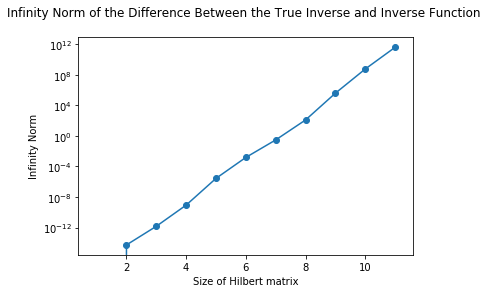

In [12]:
import scipy as sp
from scipy import linalg as la
import matplotlib.pyplot as plt

normsArrayError = []
normsArrayInverseActual = []
normsArrayInverse = []
normsArrayHilbert = []

for n in range(1, 12):
    # get the Hilbert matrix
    Hn = la.hilbert(n)
    normHilbert = np.linalg.norm(Hn, np.inf)
    normsArrayHilbert.append(normHilbert)
    
    check, inverted = solveInverse(Hn)
    normInverseF = np.linalg.norm(inverted, np.inf)
    normsArrayInverse.append(normInverseF)
    
    # compare to the true inverse
    true_inverse_Hn = la.invhilbert(n)
    normTrueInverse = np.linalg.norm(true_inverse_Hn, np.inf)
    normsArrayInverseActual.append(normTrueInverse)
    
    # so we do || true_inverse - own_inverse || infinity norm
    #print(true_inverse_Hn)
    #print(inverted)
    error = true_inverse_Hn - inverted
    infinNormerror = np.linalg.norm(error, np.inf)
    normsArrayError.append(infinNormerror)
    
#print(normsArrayError)
fig, ax = plt.subplots()
plt.plot(range(1,12), normsArrayError)
plt.scatter(range(1,12), normsArrayError)
plt.title("Infinity Norm of the Difference Between the True Inverse and Inverse Function \n")

ax.set_xlabel("Size of Hilbert matrix")
ax.set_ylabel("Infinity Norm")
ax.set_yscale('log')

print("At 1 the infinity norm is zero, which cannot be shown on the log scale, so 2-12 are shown")

## (d)
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.

<Figure size 432x288 with 0 Axes>

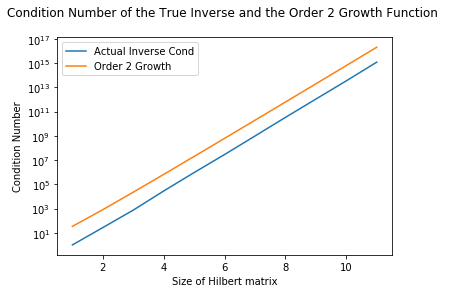

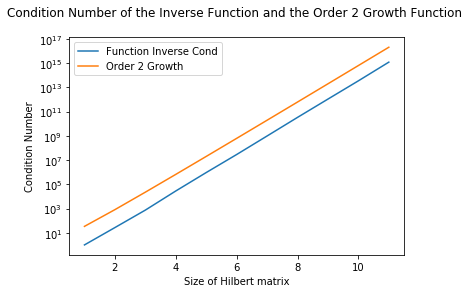

In [6]:
import math
normsIA = np.array(normsArrayInverseActual)
normsIF = np.array(normsArrayInverse)
normsH = np.array(normsArrayHilbert)

condinfAct = normsH*normsIA
condinfFun = normsH*normsIF
cond2 = []
for i in range(1,12):
    cond2.append(((1+math.sqrt(2))**(4*i))/(math.sqrt(i)))

plt.figure(0)
fig, ax = plt.subplots()
plt.semilogy(range(1,12), condinfAct, label = "Actual Inverse Cond")
plt.semilogy(range(1,12), cond2, label = "Order 2 Growth")
plt.title("Condition Number of the True Inverse and the Order 2 Growth Function \n")
ax.set_xlabel("Size of Hilbert matrix")
ax.set_ylabel("Condition Number")
plt.legend()

plt.figure(1)
fig, ax = plt.subplots()

plt.semilogy(range(1,12), condinfFun, label = "Function Inverse Cond")
plt.semilogy(range(1,12), cond2, label = "Order 2 Growth")
plt.title("Condition Number of the Inverse Function and the Order 2 Growth Function \n")
ax.set_xlabel("Size of Hilbert matrix")
ax.set_ylabel("Condition Number")
plt.legend()

The infinity condition number appears to grow in a similar manner to the 2nd order condition number.  The growth appears to diverge slightly at the end of the range, larger Hilbert functions would be required to observe if there is divergence at a later point.   